In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy as sp

In [2]:
from parse import *

## Randomly remove edges

In [6]:
Gg = read_input_file("inputs/small/small-1.in")

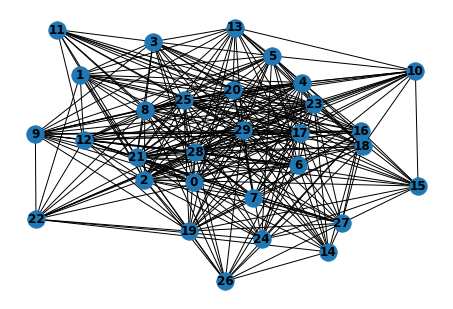

In [7]:
nx.draw(Gg, with_labels=True, font_weight='bold')

In [8]:
l = len(list(Gg.edges))
l

292

In [9]:
sp.special.binom(l, l - 15)

5.074866030134501e+24

In [10]:
nx.dijkstra_path_length(Gg, 0, 29)

25.282

In [11]:
def rem_random(G, k):
    """
    G: graph input
    k: number of random graphs to consider
    """
    v = G.number_of_nodes() - 1
    path = nx.dijkstra_path(G, 0, v)
    longest_min_path = nx.dijkstra_path_length(G, 0, v)
    rm_edges = 0
    rm_node = 0
    
    nodes = np.sort(list(G.nodes))[1:][:-1]
    
    for n in nodes:
        G_prime = nx.Graph(G)
        G_prime.remove_node(n)
        
        G_prime_edges = list(G_prime.edges)
        
        for _ in range(k):
            to_remove = random.sample(G_prime_edges, 15)
            G_prime.remove_edges_from(to_remove)
            
            if nx.is_connected(G_prime):
                new_min_path = nx.dijkstra_path_length(G_prime, 0, v)
        
                if new_min_path > longest_min_path:
                    longest_min_path = new_min_path
                    rm_edges = to_remove
                    path = nx.dijkstra_path(G_prime, 0, v)
                    rm_node = n
            
    return path, longest_min_path, rm_edges, rm_node

In [12]:
r = rem_random(Gg, 50000)
r

KeyboardInterrupt: 

In [39]:
Gg2 = read_input_file("inputs/small/small-8.in")

In [40]:
r2 = rem_random(Gg2, 50000)
r2

([0, 28, 16, 4, 22, 9, 1, 29],
 314.0,
 [(0, 16),
  (19, 12),
  (6, 15),
  (15, 12),
  (3, 17),
  (24, 4),
  (20, 10),
  (0, 18),
  (11, 26),
  (14, 26),
  (16, 29),
  (27, 14),
  (2, 25),
  (0, 21),
  (15, 26)],
 5)

This graph has 30 nodes and 111 edges


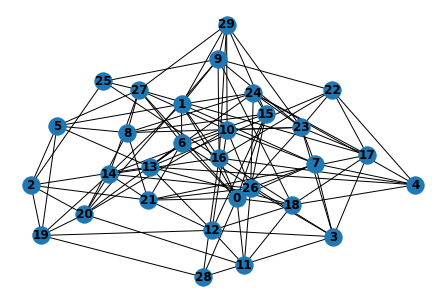

In [41]:
print("This graph has", Gg2.number_of_nodes(), "nodes and", Gg2.number_of_edges(), "edges")

nx.draw(Gg2, with_labels=True, font_weight='bold');

In [29]:
nx.dijkstra_path_length(Gg2, 0, 29)

34.0

## Rank edge based on heuristics

In [18]:
Gg = read_input_file("inputs/small/small-1.in")

77.791

In [35]:
def dijsktra_path(G):
    node_count = len(G.nodes)
    path = nx.dijkstra_path(G, 0, node_count - 1)
    print(path)
    edge = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    return edge

In [124]:
def score_components(Gg):
    dj_path = dijsktra_path(Gg)
    weight = []
    conn = []
    score = []
    in_shortest_path = []
    edges = Gg.edges.data()
    for u, v, prop in edges:
        conn.append(Gg.degree[u] + Gg.degree[v] - 2)
        weight.append(prop['weight'])
        if (u,v) in dj_path:
            in_shortest_path.append(0.5) #tune this weight
        else:
            in_shortest_path.append(0)
    
    #normalize score 
    max_weight = max(weight)
    max_conn = max(conn)
    weight = [w/max_weight for w in weight] #less than 1
    conn  = [c/max_conn for c in conn] #less than 1
    
    #calculate edge score
    e_score = np.array([conn[i] + weight[i] + in_shortest_path[i] for i in range(len(edges))])

    #add attribute e_score to each edge
    nx.set_edge_attributes(Gg, {e: {'score': e_score[i]} for i,e in enumerate(Gg.edges)})

    #calc score of node based on collective sum of e_score 
    n_score = []
    for i, node in enumerate(Gg.nodes):
        prop = Gg.edges(node, data='score')
        score = sum(i[2] for i in prop) / len(prop)
        n_score.append(score)
    
    # rank edges:
    edges = list(Gg.edges)
    argsort = np.argsort(np.array(e_score))
    sorted_edge = [edges[i] for i in argsort]
    sorted_node = np.argsort(np.array(n_score))
    sorted_node = np.delete(sorted_node, [0, len(Gg.nodes) - 1])
    return sorted_edge, sorted_node
    
def heuristics_greedy(G, cnum, knum):
    """
    Args:
        G: networkx.Graph
    Returns:
        c: list of cities to remove
        k: list of edges to remove
    """
    G_cut = G.copy()
    sorted_edge, sorted_node = score_components(G_cut)
    c, k = [], []

    for n in sorted_node:
        copy = G_cut.copy()
        copy.remove_node(n)
        if nx.is_connected(copy):
            cnum -= 1
            c.append(n)
            G_cut = copy
        if cnum == 0:
            break

    for u, v in sorted_edge:
        if u not in c and v not in c:
            G_cut.remove_edge(u, v)
            if nx.is_connected(G_cut):
                knum -= 1 
                k.append((u, v))
            else:
                G_cut.add_edge(u, v)
        if knum == 0:
            break
    
    return c, k



    
    
    
    



    

In [125]:
heuristics_greedy(Gg, 1, 15)

[0, 5, 23, 22, 29]


([14],
 [(10, 20),
  (13, 19),
  (11, 18),
  (5, 9),
  (2, 11),
  (10, 15),
  (22, 23),
  (5, 24),
  (10, 25),
  (1, 20),
  (8, 27),
  (9, 20),
  (15, 29),
  (3, 5),
  (12, 16)])

In [127]:
a = [1,2,3]
np.delete(a, [1])

array([1, 3])